In [94]:
from sklearn.preprocessing import MinMaxScaler #@@@@@@@@@@@@@@@@@ ?뭐하는건지 모르겠고 // 0,1 사이에 가중치?
a = [[1],[10],[9]]
s = MinMaxScaler(feature_range=(0,1))
a = s.fit_transform(a)
a

array([[0.        ],
       [1.        ],
       [0.88888889]])

In [95]:
import pandas as pd
import numpy as np
crime_seoul = pd.read_csv("crime_Seoul2.csv", encoding='utf-8', thousands = ",", index_col = 0) #1000자리 이상 , 제거 // 0번째 인덱스 제거

df_pivot = pd.pivot_table(crime_seoul, index='구별', aggfunc=np.sum) # 중복된것 집계해주는 테이블 group by랑 비슷 #aggfunc 안써주면 어떻게 되는지?

#컬럼추가 -> 강간검거율, 강도검거율, 살인검거율, 절도검거율, 폭력검거율
df_pivot['강간 검거율'] = round(df_pivot['강간 검거']/df_pivot['강간 발생']*100, 2)
df_pivot['강도 검거율'] = round(df_pivot['강도 검거']/df_pivot['강도 발생']*100, 2)
df_pivot['살인 검거율'] = round(df_pivot['살인 검거']/df_pivot['살인 발생']*100, 2)
df_pivot['절도 검거율'] = round(df_pivot['절도 검거']/df_pivot['절도 발생']*100, 2)
df_pivot['폭력 검거율'] = round(df_pivot['폭력 검거']/df_pivot['폭력 발생']*100, 2)

crime_pivot = df_pivot

del  crime_pivot['강간 검거']
del  crime_pivot['강도 검거']
del  crime_pivot['살인 검거']
del  crime_pivot['절도 검거']
del  crime_pivot['폭력 검거']

crime_pivot.loc[crime_pivot['강도 검거율'] > 100, '강도 검거율'] #조건 줄 수 있음
crime_pivot.loc[crime_pivot['강도 검거율'] > 100, :] #조건 줄 수 있음

cols = ['강간 검거율', '강도 검거율', '살인 검거율', '절도 검거율', '폭력 검거율']

crime_pivot.loc[crime_pivot['강도 검거율']>100 , '강도 검거율'] = 100 # 조건 맞는 값 변경 //

for col in cols:
    crime_pivot.loc[crime_pivot[col]>100, col] = 100 #100퍼센트 초과하는 항목들에 대해서 100퍼센트로 변경
    

crime_pivot.rename(columns = {'강간 발생' : '강간',
                              '강도 발생' : '강도',
                              '살인 발생' : '살인',
                              '절도 발생' : '절도',
                              '폭력 발생' : '폭력',
                             }, inplace=True)

crime_pivot.head(5)

,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11
광진구,240,14,4,3026,2625,91.67,100.00,100.00,42.20,83.05


,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386
강동구,0.155620,0.058824,0.166667,0.445775,0.289667
강북구,0.146974,0.529412,0.416667,0.126924,0.274769
관악구,0.628242,0.411765,0.583333,0.562094,0.428234
광진구,0.397695,0.529412,0.166667,0.671570,0.269094


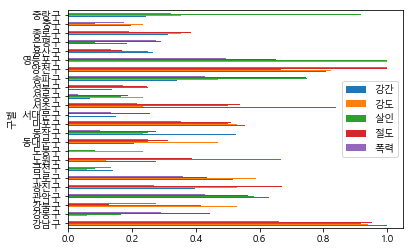

In [96]:
from sklearn.preprocessing import MinMaxScaler
col2 = ['강간','강도','살인','절도','폭력']

x = crime_pivot[col2].values
s = MinMaxScaler(feature_range=(0,1))
s2 = s.fit_transform(x.astype(float))


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


#crime_pivot.index

crime_data = pd.DataFrame(s2, columns=col2, index=crime_pivot.index)
crime_data.plot(kind = 'barh')
crime_data.head()

In [97]:
print(crime_pivot.head())
crime_pivot[col2] = crime_data[col2]
crime_pivot.head()

      강간  강도  살인    절도    폭력  강간 검거율  강도 검거율  살인 검거율  절도 검거율  폭력 검거율
구별                                                                  
강남구  449  21  13  3850  4284   77.73   85.71   76.92   42.86   86.48
강동구  156   6   4  2366  2712   78.85  100.00   75.00   33.35   82.89
강북구  153  14   7  1434  2649   82.35   92.86  100.00   43.10   88.64
관악구  320  12   9  2706  3298   69.06  100.00   88.89   30.56   80.11
광진구  240  14   4  3026  2625   91.67  100.00  100.00   42.20   83.05


,강간,강도,살인,절도,폭력,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.73,85.71,76.92,42.86,86.48
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.85,100.00,75.00,33.35,82.89
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.35,92.86,100.00,43.10,88.64
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.06,100.00,88.89,30.56,80.11
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.67,100.00,100.00,42.20,83.05
